# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
import os
os.chdir("F:/f/MY____/AAIC/AssignmentS/DonorsChoose_Data")
os.getcwd()

'F:\\f\\MY____\\AAIC\\AssignmentS\\DonorsChoose_Data'

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\Anvesh\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [3]:
from tqdm import tqdm
for i in tqdm(range(int(10e6))):
    pass

100%|█████████████████████████████████████████████████████████████████| 10000000/10000000 [00:03<00:00, 2719160.33it/s]


In [4]:
project_data = pd.read_csv('train_data.csv', nrows = 50000)
resource_data = pd.read_csv('resources.csv')

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

## Introducing New Features


<b>Consider these set of features for Set 5 in Assignment:</b>

<b>categorical data</b>school_state 
clean_categories....clean_subcategories....project_grade_category....teacher_prefix

<b>numerical data</b>
quantity....teacher_number_of_previously_posted_projects....price

<b>New Features</b>

sentiment score's of each of the essay : <b> numerical data</b>   <br>
number of words in the title : <b> numerical data </b>  <br>
number of words in the combine essays : <b> numerical data </b>  <br>

In [12]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
new_title = []
for i in tqdm(project_data['project_title']):
    j = decontracted(i)
    new_title.append(j)   
    

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 74600.28it/s]


In [14]:
#Introducing New Features
title_word_count = []
#for i in project_data['project_title']:
for i in tqdm(new_title):
    j = len(i.split())
    title_word_count.append(j)
    #print(j)
project_data['title_word_count'] = title_word_count


100%|████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 724730.28it/s]


In [15]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  
0  My students are English learners that are work...                 7  
1  Our students arrive to our school eager to lea...                 5

In [16]:
new_essay = []
for i in tqdm(project_data['essay']):
    j = decontracted(i)
    new_essay.append(j)  

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 41259.91it/s]


In [17]:
essay_word_count = []
for i in tqdm(new_essay):
    j = len(i.split())
    essay_word_count.append(j)
    #print(j)
project_data['essay_word_count'] = essay_word_count


100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 41576.60it/s]


In [18]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  \
0  My students are English learners that are work...                 7   
1  Our students arrive to our school eager to lea...                 5   

   essay_word_count  
0               275  
1               221

### __Computing Sentiment Scores__

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.109, neu: 0.693, pos: 0.198, compound: 0.2023, 

In [20]:
SID = SentimentIntensityAnalyzer()
#There is NEGITIVE and POSITIVE and NEUTRAL and COMPUND SCORES
#http://www.nltk.org/howto/sentiment.html
    
negitive = []
positive = []
neutral = []
compound = []
for i in tqdm(project_data['essay']):
    j = SID.polarity_scores(i)['neg']
    k = SID.polarity_scores(i)['neu']
    l = SID.polarity_scores(i)['pos']
    m = SID.polarity_scores(i)['compound']
    negitive.append(j)
    positive.append(k)
    neutral.append(l)
    compound.append(m)


100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [12:57<00:00, 64.27it/s]


In [21]:
project_data['negitive'] = negitive
project_data['positive'] = positive
project_data['neutral'] = neutral
project_data['compound'] = compound

In [22]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  ... project_is_approved  \
0  \"The limits of your language are the limits o...  ...                   0   
1  The projector we need for our school is very c...  ...                   1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  \
0  My students are English learners that are work...                 7   
1  Our students arrive to our school eager to lea...                 5   

  essay_word_count negitive positive  neutral  compound  
0              275    0.008    0.911    0.081    0.9611  
1              221    0.037    0.851    0.112    0.9267  

[2 rows x 24 columns]

## 1.4 Train_Test_Split

In [23]:
#Train Test Split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(project_data, project_data["project_is_approved"],
                                                    test_size = 0.33, stratify = project_data["project_is_approved"],
                                                    random_state = 42)

In [24]:
#Train CV Split
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size = 0.33, stratify = y_train,
                                                random_state = 42)

In [25]:
print(x_test.columns)
print(x_train.columns)
#print(x_cv.columns)
#print(x_train.shape)
#print(x_test.shape)
#print(x_cv.shape)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_count', 'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_count', 'negitive', 'pos

In [26]:
#Dropping Class Label in train test and cv data
x_train.drop(["project_is_approved"], axis = 1, inplace = True)
x_test.drop(["project_is_approved"], axis = 1, inplace = True)
x_cv.drop(["project_is_approved"], axis = 1, inplace = True)

In [27]:
print(x_train.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'title_word_count', 'essay_word_count',
       'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')


### Preparing Data for Models

In [28]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [29]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [30]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [31]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [32]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### Project_Essays preprocessing

In [33]:
#train_preprocessed_essays 
# Combining all the above stundents 
from tqdm import tqdm
train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(x_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    train_preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:17<00:00, 1262.92it/s]


In [34]:
train_preprocessed_essays[10]

'my students naturally inquisitive respectful innate concern others community well outside community 90 love read fun exploring new genres within classroom they connect thematic elements text outside world oftentimes bring new item piece information pertaining unit time they brilliant give hope future area state country they running place another 20 30 years vital nurture naturally inquisitive minds fullest extent possible help student learning skyrocket tools engage formative assessment students use markers erasers individual lapboards provide feedback answers questions posed reviewed content they also use review games planning group collaboration inferences within text reading the teacher complete view grasped material not the mobile organizer used organize markers erasers pencils glue classwork better organization ensure class runs smoothly kids teacher stay focused instruction time higher quality nannan'

In [35]:
# test_preprocessed_essay
from tqdm import tqdm
test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(x_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    test_preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:13<00:00, 1262.76it/s]


In [36]:
test_preprocessed_essays[10]

'our elementary school beautifully old building 91 years old houses many classrooms ranging kindergarten fifth grade it home full adults children love learn new students joining family year kindergarteners the students enter classroom year excited nervous unaware fun magic awaits they start academic journey many entering school first time my students come backgrounds deserving love endless opportunites they love discovering ways guided encouraged become independent take ownership learning studies show music vital part learning certain areas brain activated music help many different types learners classroom my students feel inspired songs i carefully choose match theme they learn active means healthy happy dance fun beats favorite songs they not help sing dance along lighting fire learning there many different types learners good majority find music great way help remember things somewhat tedious parts day clean become exciting tidy beat music slow fast kindergarten also creating things

In [37]:
# CV_preprocessed_essays
from tqdm import tqdm
cv_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(x_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    cv_preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:09<00:00, 1143.86it/s]


In [38]:
cv_preprocessed_essays[10]

'our students great time using bright colorful glazes expensive not afford please help us get basic colors finish project help us purchase tools create beautiful works art for many first experience fine arts clay this high school mix cultures socioeconomic backgrounds some students not speak much english still create clay projects we also students learning disabilities ceramics classes our school currently california distinguished school teachers students proud hard work this one first projects students make clay they introduced coil building technique well introduced making repeated patterns clay shapes the students create original pot shows unique personality ideas they learn many artists art elements principles well learn basic ceramic building techniques they influenced anything around pop culture artists even disney movies influences lives this project use common core state visual arts standards then also paint patterned pots bright vivid glaze colors make designs choose stand loo

### Project_Titles_preprocessing

In [39]:
# train_preprocessed_title
from tqdm import tqdm
train_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(x_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    train_preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 26698.55it/s]


In [40]:
train_preprocessed_titles[10]

'show me work student lap board markers organizer'

In [41]:
# Test_preprocessed_essays
from tqdm import tqdm
test_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(x_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    test_preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 26303.42it/s]


In [42]:
test_preprocessed_titles[10]

'we need make music capture memories'

In [43]:
# CV_preprocessed_titles
from tqdm import tqdm
cv_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(x_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    cv_preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 24759.71it/s]


In [44]:
# after preprocesing
cv_preprocessed_titles[10]

'creative coil pottery'

In [45]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_count', 'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [46]:
# we use count vectorizer to convert the values into one 
# Vectorizing Clean Categories 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

vectorizer.fit(x_train['clean_categories'].values)
train_categories_one_hot = vectorizer.fit_transform(x_train['clean_categories'].values)
test_categories_one_hot = vectorizer.transform(x_test['clean_categories'].values)
cv_categories_one_hot = vectorizer.transform(x_cv['clean_categories'].values)

cat_feat = vectorizer.get_feature_names()   #For Decision Tree
print(cat_feat)
print("Shape of  Train matrix after one hot encodig ",train_categories_one_hot.shape)
print("Shape of  Test matrix after one hot encodig ",test_categories_one_hot.shape)
print("Shape of  cv  matrix after one hot encodig ",cv_categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of  Train matrix after one hot encodig  (22445, 9)
Shape of  Test matrix after one hot encodig  (16500, 9)
Shape of  cv  matrix after one hot encodig  (11055, 9)


In [47]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train["clean_subcategories"].values)
train_sub_categories_one_hot = vectorizer.fit_transform(x_train['clean_subcategories'].values)
test_sub_categories_one_hot = vectorizer.transform(x_test['clean_subcategories'].values)
cv_sub_categories_one_hot = vectorizer.transform(x_cv['clean_subcategories'].values)

sub_cat_feat = vectorizer.get_feature_names() #For Decision Tree

print(vectorizer.get_feature_names())
print("Shape of Train matrix after  Trainone hot encodig ",train_sub_categories_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_sub_categories_one_hot.shape)
print("Shape of cv_ matrix after  one hot encodig ",cv_sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of Train matrix after  Trainone hot encodig  (22445, 30)
Shape of test matrix after one hot encodig  (16500, 30)
Shape of cv_ matrix after  one hot encodig  (11055, 30)


In [48]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
from collections import Counter
my_counter = Counter()
for word in project_data["school_state"].values:
    my_counter.update(word.split())

In [49]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_cat_dict = dict(my_counter)
storted_state_cat_dict = dict(sorted(state_cat_dict.items(), key=lambda kv: kv[1]))

In [50]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
#Using Count Vectorizer to convert the state value onto on hot encoded feature
vectorizer = CountVectorizer(vocabulary=list(storted_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_feat = vectorizer.get_feature_names() #For Decision Tree

train_state_one_hot = vectorizer.fit_transform(x_train['school_state'].values)
test_state_one_hot = vectorizer.transform(x_test['school_state'].values)
cv_state_one_hot = vectorizer.transform(x_cv['school_state'].values)

print("Shape of Train matrix after one hot encodig ",train_state_one_hot.shape)
print("Shape of Test matrix after one hot encodig ",test_state_one_hot.shape)
print("Shape of CV matrix after one hot encodig ",cv_state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'AK', 'DE', 'WV', 'ME', 'NM', 'HI', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'CT', 'TN', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of Train matrix after one hot encodig  (22445, 51)
Shape of Test matrix after one hot encodig  (16500, 51)
Shape of CV matrix after one hot encodig  (11055, 51)


In [51]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
#project_data['project_grade_category']=project_data['project_grade_category'].fillna("")
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())


In [52]:
project_cat_dict = dict(my_counter)
sorted_project_cat_dict = dict(sorted(project_cat_dict.items(), key=lambda kv: kv[1]))

In [53]:
# feature encoding for project_grade_category also
vectorizer = CountVectorizer(vocabulary=list(sorted_project_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())

grade_feat = vectorizer.get_feature_names() #For Decision Tree

train_grade_one_hot = vectorizer.fit_transform(x_train['project_grade_category'].values)
test_grade_one_hot = vectorizer.transform(x_test['project_grade_category'].values)
cv_grade_one_hot = vectorizer.transform(x_cv['project_grade_category'].values)

train_grade_one_hot = train_grade_one_hot[:, 0:4]
test_grade_one_hot = test_grade_one_hot[:, 0:4]
cv_grade_one_hot = cv_grade_one_hot[:, 0:4]

print("Shape of Train matrix after one hot encodig ",train_grade_one_hot.shape)
print("Shape of test matrix after one hot encodig ",test_grade_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",cv_grade_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of Train matrix after one hot encodig  (22445, 4)
Shape of test matrix after one hot encodig  (16500, 4)
Shape of cv matrix after one hot encodig  (11055, 4)


In [54]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna(" ")

In [55]:
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

In [56]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_cat_dict = dict(my_counter)
sorted_teacher_cat_dict = dict(sorted(teacher_cat_dict.items(), key=lambda kv: kv[1]))

In [57]:
#Using Count Vectorizer to convert the teacher_prefix value onto on hot encoded feature
#ValueError: np.nan is an invalid document, expected byte or unicode string.
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())

teacher_feat = vectorizer.get_feature_names() #For Decision Tree

train_teacher_one_hot = vectorizer.fit_transform(x_train['teacher_prefix'].values.astype('U'))
test_teacher_one_hot = vectorizer.transform(x_test['teacher_prefix'].values.astype('U'))
cv_teacher_one_hot = vectorizer.transform(x_cv['teacher_prefix'].values.astype('U'))

print("Shape of Train matrix after one hot encodig ",train_teacher_one_hot.shape)
print("Shape of Test matrix after one hot encodig ",test_teacher_one_hot.shape)
print("Shape of CV matrix after one hot encodig ",cv_teacher_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of Train matrix after one hot encodig  (22445, 5)
Shape of Test matrix after one hot encodig  (16500, 5)
Shape of CV matrix after one hot encodig  (11055, 5)


### 1.5.2 Vectorizing Text data

### 1.5.2.1 Bag of words

<b>Minimum frequency of words 10 (min_df = 10) of ALL features  </b>

In [58]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_essays)

BOW_feat_essay = vectorizer.get_feature_names() #For Decision Tree

train_text_bow = vectorizer.fit_transform(train_preprocessed_essays)
print("Shape of matrix after one hot encodig ",train_text_bow.shape)

Shape of matrix after one hot encodig  (22445, 8869)


In [59]:
#Vectorizing Test Data
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
test_text_bow = vectorizer.transform(test_preprocessed_essays)
print("Shape of matrix after one hot encodig ",test_text_bow.shape)

Shape of matrix after one hot encodig  (16500, 8869)


In [60]:
# Vectrozing CV Data 
cv_text_bow = vectorizer.transform(cv_preprocessed_essays)
print("Shape of matrix after one hot encodig ",cv_text_bow.shape)

Shape of matrix after one hot encodig  (11055, 8869)


### Project_Title BOW 

In [61]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_titles)

BOW_feat_title = vectorizer.get_feature_names()

train_titles_bow = vectorizer.fit_transform(train_preprocessed_titles)
print("Shape of matrix after one hot encodig ",train_titles_bow.shape)

Shape of matrix after one hot encodig  (22445, 1229)


In [62]:
#Vectorizing Test Data
test_titles_bow = vectorizer.transform(test_preprocessed_titles)
print("Shape of matrix after one hot encodig ",test_titles_bow.shape)

Shape of matrix after one hot encodig  (16500, 1229)


In [63]:
#Vectrizing CV Data
cv_titles_bow = vectorizer.transform(cv_preprocessed_titles)
print("Shape of matrix after one hot encodig ",cv_titles_bow.shape)

Shape of matrix after one hot encodig  (11055, 1229)


### 1.5.2.2 TFIDF vectorizer

<b>Here also we are considering word frequency of 10 words(min_df = 10) of all features </b>

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_essays)

TFIDF_feat_essay = vectorizer.get_feature_names()

train_text_tfidf = vectorizer.fit_transform(train_preprocessed_essays)
print("Shape of matrix after one hot encodig ",train_text_tfidf.shape)

Shape of matrix after one hot encodig  (22445, 8869)


In [65]:
test_text_tfidf = vectorizer.transform(test_preprocessed_essays)
print("Shape of matrix after one hot encodig ",test_text_tfidf.shape)

Shape of matrix after one hot encodig  (16500, 8869)


In [66]:
cv_text_tfidf = vectorizer.transform(cv_preprocessed_essays)
print("Shape of matrix after one hot encodig ",cv_text_tfidf.shape)

Shape of matrix after one hot encodig  (11055, 8869)


#### Project Titles

In [67]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(train_preprocessed_titles)

TFIDF_feat_titles = vectorizer.get_feature_names()

train_title_tfidf = vectorizer.fit_transform(train_preprocessed_titles)
print("Shape of matrix after one hot encodig ",train_title_tfidf.shape)

Shape of matrix after one hot encodig  (22445, 1229)


In [68]:
test_title_tfidf = vectorizer.transform(test_preprocessed_titles)
print("Shape of matrix after one hot encodig ",test_title_tfidf.shape)

Shape of matrix after one hot encodig  (16500, 1229)


In [69]:
cv_title_tfidf = vectorizer.transform(cv_preprocessed_titles)
print("Shape of matrix after one hot encodig ",cv_title_tfidf.shape)

Shape of matrix after one hot encodig  (11055, 1229)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [70]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [71]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [72]:
# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors.append(vector)

print(len(train_avg_w2v_vectors))
print(len(train_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:10<00:00, 2141.40it/s]


22445
300


In [73]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors.append(vector)

print(len(test_avg_w2v_vectors))
print(len(test_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:07<00:00, 2219.44it/s]


16500
300


In [74]:
# average Word2Vec
# compute average word2vec for each review.
cv_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_vectors.append(vector)

print(len(cv_avg_w2v_vectors))
print(len(cv_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:04<00:00, 2251.68it/s]


11055
300


### AVG_W2V Project_Titles

In [75]:
# average Word2Vec
# compute average word2vec for each review.
train_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_title_avg_w2v_vectors.append(vector)

print(len(train_title_avg_w2v_vectors))
print(len(train_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 37899.73it/s]


22445
300


In [76]:
# average Word2Vec
# compute average word2vec for each review.
test_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_title_avg_w2v_vectors.append(vector)

print(len(test_title_avg_w2v_vectors))
print(len(test_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 36776.40it/s]


16500
300


In [77]:
# average Word2Vec
# compute average word2vec for each review.
cv_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_title_avg_w2v_vectors.append(vector)

print(len(cv_title_avg_w2v_vectors))
print(len(cv_title_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 38769.71it/s]


11055
300


### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [78]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(train_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [79]:
# average Word2Vec
# compute average word2vec for each review.
train_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_essay_tfidf_w2v_vectors.append(vector)

print(len(train_essay_tfidf_w2v_vectors))
print(len(train_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:12<00:00, 311.09it/s]


22445
300


In [80]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
test_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_essay_tfidf_w2v_vectors.append(vector)

print(len(test_essay_tfidf_w2v_vectors))
print(len(test_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:52<00:00, 316.98it/s]


16500
300


In [81]:
# average Word2Vec
# compute average word2vec for each review.
cv_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_essay_tfidf_w2v_vectors.append(vector)

print(len(cv_essay_tfidf_w2v_vectors))
print(len(cv_essay_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:35<00:00, 308.72it/s]


11055
300


### Proect_titles

In [82]:
# average Word2Vec
# compute average word2vec for each review.
train_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_title_tfidf_w2v_vectors.append(vector)

print(len(train_title_tfidf_w2v_vectors))
print(len(train_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:01<00:00, 18224.54it/s]


22445
300


In [83]:
# average Word2Vec
# compute average word2vec for each review.
test_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_title_tfidf_w2v_vectors.append(vector)

print(len(test_title_tfidf_w2v_vectors))
print(len(test_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 17924.26it/s]


16500
300


In [84]:
# average Word2Vec
# compute average word2vec for each review.
cv_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_title_tfidf_w2v_vectors.append(vector)

print(len(cv_title_tfidf_w2v_vectors))
print(len(cv_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 18628.94it/s]


11055
300


### 1.5.3 Vectorizing Numerical features

In [85]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
print(price_data.head())
#print(project_data.columns)
print(x_train.columns)

        id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'title_word_count', 'essay_word_count',
       'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')


In [86]:
#   - quantity : numerical (optinal)
#   - teacher_number_of_previously_posted_projects : numerical
#   - price : numerical
x_train = pd.merge(x_train, price_data, on = "id", how = "left")
#print(x_train.columns)
x_test = pd.merge(x_test, price_data, on = "id", how = "left")
x_cv = pd.merge(x_cv, price_data, on = "id", how = "left")

### Standardize Price

In [87]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()

price_scalar.fit(x_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TRAIN -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
train_price_standar = price_scalar.transform(x_train['price'].values.reshape(-1, 1))

price_scalar.fit(x_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TEST -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
test_price_standar = price_scalar.transform(x_test['price'].values.reshape(-1, 1))

price_scalar.fit(x_cv['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"CV -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
cv_price_standar = price_scalar.transform(x_cv['price'].values.reshape(-1, 1))

TRAIN -> Mean : 297.71562753397194, Standard deviation : 373.5890845438879
TEST -> Mean : 301.40470666666664, Standard deviation : 387.6948484063583
CV -> Mean : 299.52771506105836, Standard deviation : 373.1478347400019


In [88]:
print(train_price_standar.shape, y_train.shape)
print(test_price_standar.shape, y_test.shape)
print(cv_price_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


### Standardize Teacher previously posted Projects

In [89]:
warnings.filterwarnings("ignore")
price_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TRAIN -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
train_prev_proj_standar = price_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

price_scalar.fit(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TEST -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
test_prev_proj_standar = price_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

price_scalar.fit(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"CV -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
cv_prev_proj_standar = price_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

TRAIN -> Mean : 11.66473602138561, Standard deviation : 29.394684894505467
TEST -> Mean : 10.824363636363636, Standard deviation : 26.94848396907338
CV -> Mean : 11.040253279059248, Standard deviation : 27.32928192601594


In [90]:
print(train_prev_proj_standar.shape, y_train.shape)
print(test_prev_proj_standar.shape, y_test.shape)
print(cv_prev_proj_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


### Standardize Quantity

In [91]:
price_scalar.fit(x_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TRAIN -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
train_quantity_standar = price_scalar.transform(x_train['quantity'].values.reshape(-1, 1))

price_scalar.fit(x_test['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"TEST -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
test_quantity_standar = price_scalar.transform(x_test['quantity'].values.reshape(-1, 1))

price_scalar.fit(x_cv['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"CV -> Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance.
cv_quantity_standar = price_scalar.transform(x_cv['quantity'].values.reshape(-1, 1))

TRAIN -> Mean : 17.001470260637113, Standard deviation : 26.03701886058425
TEST -> Mean : 17.05290909090909, Standard deviation : 27.494020077501187
CV -> Mean : 17.173224785165083, Standard deviation : 27.30705061932881


In [92]:
print(train_quantity_standar.shape, y_train.shape)
print(test_quantity_standar.shape, y_test.shape)
print(cv_quantity_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


### Standardize Title_word_count

In [93]:
title_scalar = StandardScaler()
title_scalar.fit(x_train['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
train_title_word_count_standar = title_scalar.transform(x_train['title_word_count'].values.reshape(-1, 1))

title_scalar.fit(x_test['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
test_title_word_count_standar = title_scalar.transform(x_test['title_word_count'].values.reshape(-1, 1))

title_scalar.fit(x_cv['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
cv_title_word_count_standar = title_scalar.transform(x_cv['quantity'].values.reshape(-1, 1))

print(train_title_word_count_standar.shape, y_train.shape)
print(test_title_word_count_standar.shape, y_test.shape)
print(cv_title_word_count_standar.shape, y_cv.shape)

Mean : 5.215103586544887, Standard deviation : 27.30705061932881
Mean : 5.2118787878787876, Standard deviation : 27.30705061932881
Mean : 5.2236996834011755, Standard deviation : 27.30705061932881
(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


### Standardize Essay_word_count

In [94]:
essay_scalar = StandardScaler()

essay_scalar.fit(x_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_essay_word_count_standar = essay_scalar.transform(x_train['essay_word_count'].values.reshape(-1, 1))

essay_scalar.fit(x_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
test_essay_word_count_standar = essay_scalar.transform(x_test['essay_word_count'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_essay_word_count_standar = essay_scalar.transform(x_cv['essay_word_count'].values.reshape(-1, 1))

print(train_essay_word_count_standar.shape, y_train.shape)
print(test_essay_word_count_standar.shape, y_test.shape)
print(cv_essay_word_count_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


### Standardize Positive Intensity

In [95]:

essay_scalar.fit(x_train['positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_positive_standar = essay_scalar.transform(x_train['positive'].values.reshape(-1, 1))

essay_scalar.fit(x_train['positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
test_positive_standar = essay_scalar.transform(x_test['positive'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_positive_standar = essay_scalar.transform(x_cv['positive'].values.reshape(-1, 1))

print(train_positive_standar.shape, y_train.shape)
print(test_positive_standar.shape, y_test.shape)
print(cv_positive_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


### Standarsize Negitive Intensity

In [96]:

essay_scalar.fit(x_train['negitive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_negitive_standar = essay_scalar.transform(x_train['negitive'].values.reshape(-1, 1))

essay_scalar.fit(x_train['negitive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
test_negitive_standar = essay_scalar.transform(x_test['negitive'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['negitive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_negitive_standar = essay_scalar.transform(x_cv['negitive'].values.reshape(-1, 1))

print(train_negitive_standar.shape, y_train.shape)
print(test_negitive_standar.shape, y_test.shape)
print(cv_negitive_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


### Standardize Neutral Intensity

In [97]:

essay_scalar.fit(x_train['neutral'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
train_neutral_standar = essay_scalar.transform(x_train['neutral'].values.reshape(-1, 1))

essay_scalar.fit(x_train['neutral'].values.reshape(-1,1))
test_neutral_standar = essay_scalar.transform(x_test['neutral'].values.reshape(-1, 1))

essay_scalar.fit(x_cv['neutral'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
cv_neutral_standar = essay_scalar.transform(x_cv['neutral'].values.reshape(-1, 1))

print(train_neutral_standar.shape, y_train.shape)
print(test_neutral_standar.shape, y_test.shape)
print(cv_neutral_standar.shape, y_cv.shape)

(22445, 1) (22445,)
(16500, 1) (16500,)
(11055, 1) (11055,)


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Decision Tree 

## 2.1 DT On Set-1

### Merging all Categorical and Numerical  _ SET-1 BOW Encoding

In [183]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_one_hot,train_text_bow, train_titles_bow, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_title_word_count_standar, 
                  train_essay_word_count_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar)).tocsr()
print(X_train.shape, y_train.shape)
print(type(X_train))


(22445, 10205) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [184]:
X_test = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot,test_text_bow, test_titles_bow, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar, test_essay_word_count_standar, 
                  test_title_word_count_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar)).tocsr()
print(X_test.shape, y_test.shape)
print(type(X_test))

(16500, 10205) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [185]:
X_cv = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_state_one_hot, cv_grade_one_hot,
                  cv_teacher_one_hot, cv_text_bow, cv_titles_bow, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar, cv_essay_word_count_standar, 
                  cv_title_word_count_standar, cv_positive_standar, cv_negitive_standar,
                  cv_neutral_standar)).tocsr()
print(X_cv.shape, y_cv.shape)
print(type(X_cv))

(11055, 10205) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


In [186]:
print(X_train.shape, y_train.shape)

(22445, 10205) (22445,)


## Hyperparameter Tunning GridSearch

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sea

In [188]:
DT = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

classifier = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
classifier.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

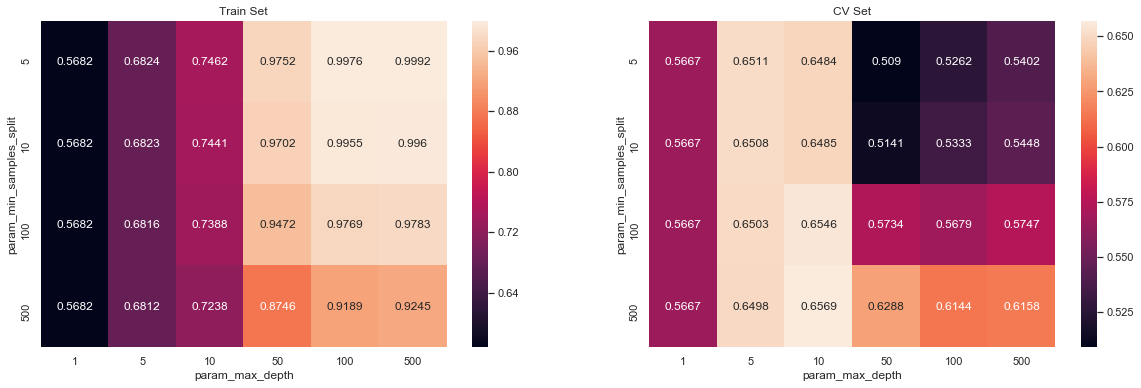

In [189]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### Trainng Model Using Best HyperParameter

In [190]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

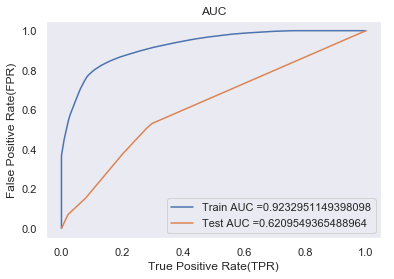

In [192]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 100, min_samples_split = 500)
classifier_viz = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

classifier.fit(X_train, y_train)
classifier_viz.fit(X_train, y_train)

y_train_pred = batch_predict(classifier,X_train)    
y_test_pred = batch_predict(classifier_viz,X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix for Train and Test Data

In [193]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.7167249621379379 for threshold 0.719
the maximum value of tpr*(1-fpr) 0.37269325393130454 for threshold 0.808


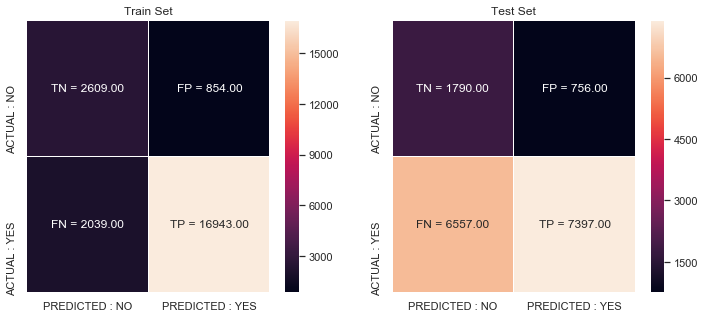

In [194]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

## Tree Visualization

In [199]:
BOW_feature = cat_feat + sub_cat_feat + grade_feat + school_feat + teacher_feat + BOW_feat_essay + BOW_feat_title
#BOW_feature.append('price')
#BOW_feature.append('teacher_number_of_previously_posted_projects')
#BOW_feature.append('quantity')
#BOW_feature.append('title_word_count')
#BOW_feature.append('essay_word_count')
#BOW_feature.append('positive')
#BOW_feature.append('negitive')

len(BOW_feature)

10205

In [201]:
TFIDF_feature = cat_feat + sub_cat_feat + grade_feat + school_feat + teacher_feat + BOW_feat_essay + BOW_feat_title
#TFIDF_feature.append('price')
#TFIDF_feature.append('teacher_number_of_previously_posted_projects')
#TFIDF_feature.append('quantity')
#TFIDF_feature.append('title_word_count')
#TFIDF_feature.append('essay_word_count')
#TFIDF_feature.append('positive')
#TFIDF_feature.append('negitive')
len(TFIDF_feature)

10205

In [197]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### BOW encoded Decision Tree

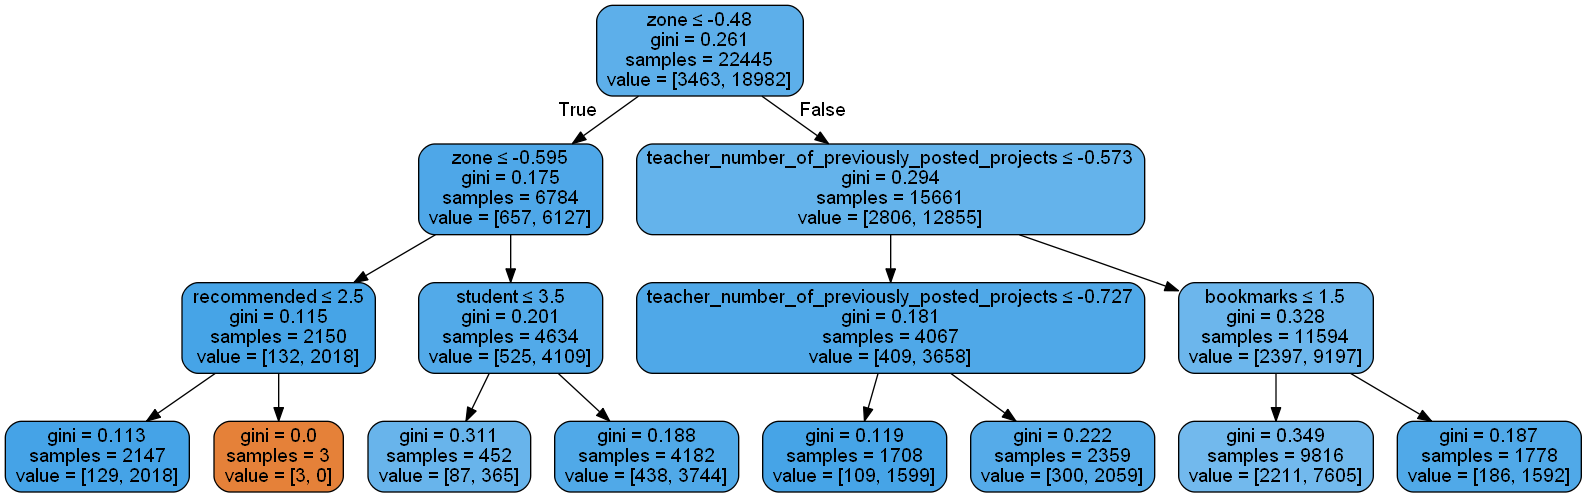

In [200]:
dot_data = StringIO()

export_graphviz(classifier_viz, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=BOW_feature)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### TFIDF encoded Decision Tree

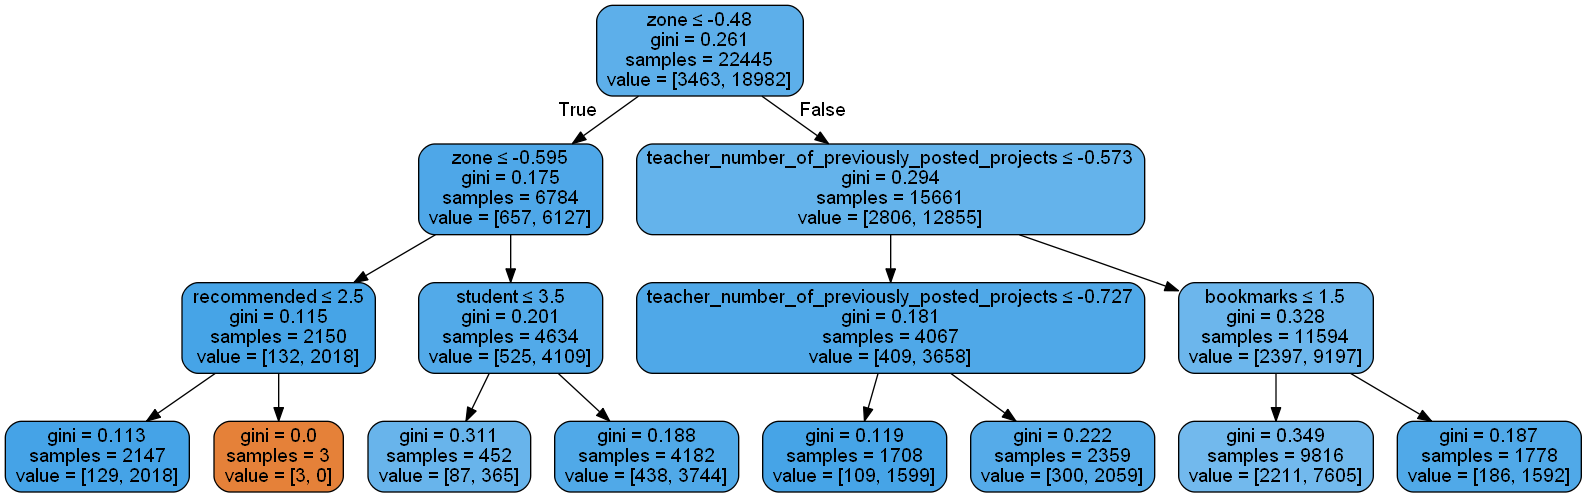

In [202]:
dot_data = StringIO()

export_graphviz(classifier_viz, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=TFIDF_feature)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## False Positive Word Cloud

In [244]:
bow_test = test_text_bow.todense()
print(bow_test.shape)
len(BOW_feat_essay)

(16500, 8869)


8869

In [247]:
y_test_list = list(y_test[::])
len(y_test_list)

16500

In [245]:
fp_index = []
fp_count = 0

for i in range(len(y_test_pred)):
    if y_test_list[i] == 0 and y_test_pred[i] <= 0.9:
        fp_index.append(i)
        fp_count = fp_count + 1 
    else :
        pass
print(fp_count)

2491


In [268]:
fp_index[0:10]

[0, 2, 3, 9, 14, 15, 20, 23, 26, 43]

In [269]:
df1 = pd.DataFrame(bow_test) 

In [274]:
df1_final = df1.iloc[fp_index,:]
print(df1_final.shape)

(2491, 8869)


In [275]:
best_indices = []

for j in range(8869):    
    s = df1_final[j].sum()
    if s >= 100 :
        best_indices.append(j)
    else :
        continue    

In [276]:
len(best_indices)

591

In [277]:
best_indices[0:10] 

[3, 45, 105, 161, 162, 163, 182, 183, 194, 234]

In [279]:
fp_words = []

for a in best_indices :
    fp_words.append(str(BOW_feature[a]))

In [280]:
fp_words[0:10]

['Music_Arts', 'WY', '10th', '31', '32', '320', '43', '44', '504', '81']

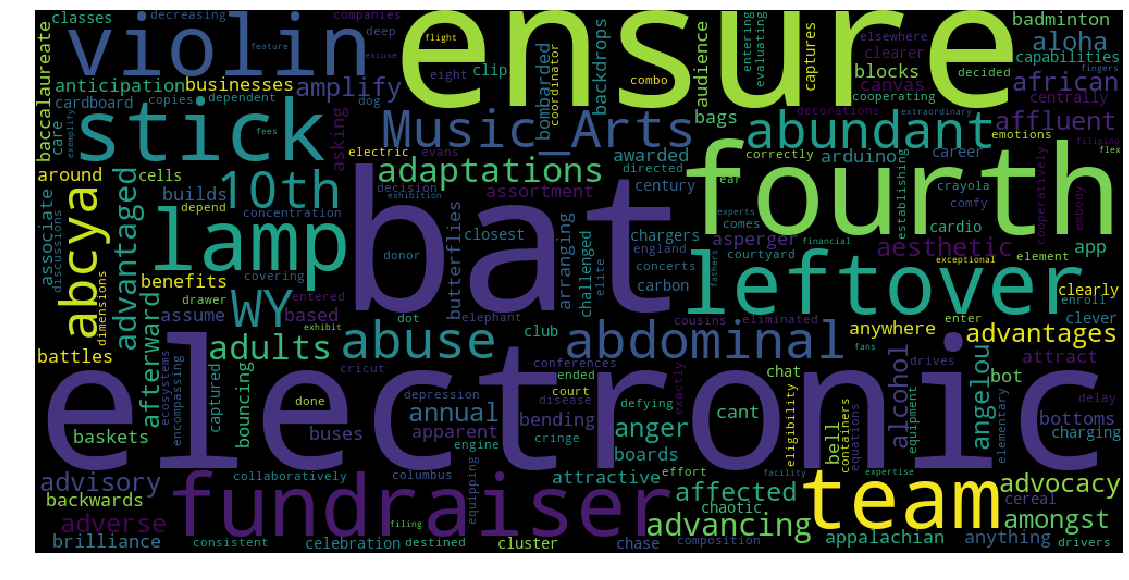

In [285]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
#convert list to string and generate
words_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Box & PDF plot for False Positives

In [222]:
df = pd.DataFrame(x_test['price'])
print(df.head(2))

    price
0  337.18
1   89.49


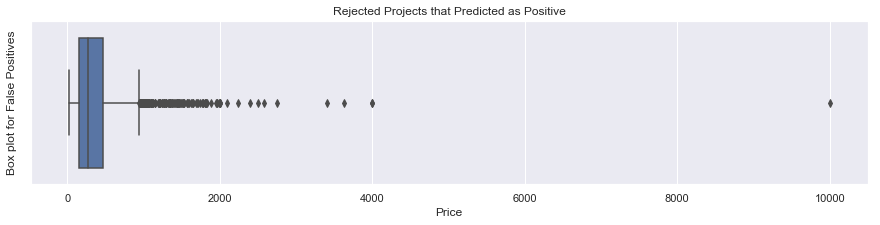

In [262]:
plt.figure(figsize=(15,3))
df1 = df.iloc[fp_index, : ]
sea.boxplot(df1.values)
plt.title("Rejected Projects that Predicted as Positive")
plt.ylabel("Box plot for False Positives")
plt.xlabel("Price")
plt.show()

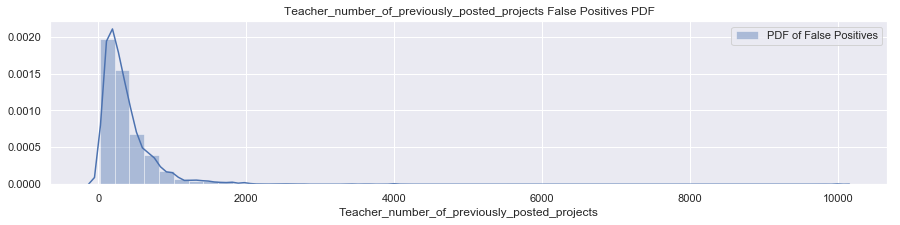

In [263]:
plt.figure(figsize=(15,3))
sns.distplot(df1.values, label="PDF of False Positives")
plt.title('Teacher_number_of_previously_posted_projects False Positives PDF')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

## 2.2 Merging all Categorical and Numerical _ SET-2 TF-IDF Encoding

In [207]:
X_train = hstack((train_categories_one_hot, train_sub_categories_one_hot, train_state_one_hot, train_grade_one_hot,
                  train_teacher_one_hot,train_text_tfidf, train_title_tfidf, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_title_word_count_standar, 
                  train_essay_word_count_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar)).tocsr()
print(X_train.shape, y_train.shape)
print(type(X_train))

(22445, 10205) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [208]:
X_test = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot,test_text_tfidf, test_title_tfidf, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar,test_title_word_count_standar, 
                  test_essay_word_count_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar)).tocsr()
print(X_test.shape, y_test.shape)
print(type(X_test))

(16500, 10205) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [209]:
X_cv = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,cv_state_one_hot,cv_grade_one_hot,
                  cv_teacher_one_hot,cv_text_tfidf, cv_title_tfidf, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar, cv_title_word_count_standar, 
                  cv_essay_word_count_standar, cv_positive_standar, cv_negitive_standar,
                  cv_neutral_standar)).tocsr()
print(X_cv.shape, y_cv.shape)
print(type(X_cv))

(11055, 10205) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


### Hyperparameter Tunning

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
DT = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

classifier_5 = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
classifier_5.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

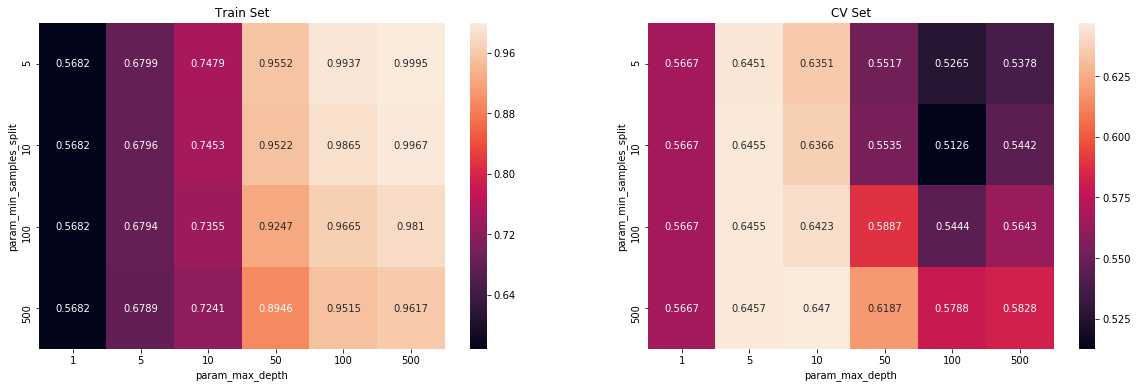

In [107]:
import seaborn as sea
max_scores = pd.DataFrame(classifier_5.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))
sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### Training Model using best Hyperparameter

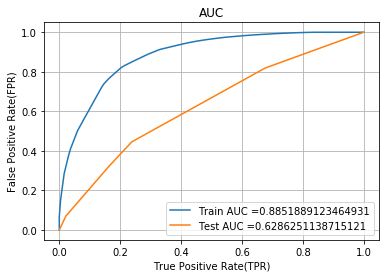

In [119]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 50, min_samples_split = 500)
classifier_viz = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

classifier.fit(X_train, y_train)
classifier_viz.fit(X_train, y_train)

y_train_pred = batch_predict(classifier,X_train)    
y_test_pred = batch_predict(classifier_viz,X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix For Train & Test Data

the maximum value of tpr*(1-fpr) 0.6601800638950536 for threshold 0.927
the maximum value of tpr*(1-fpr) 0.33947756296330406 for threshold 0.873


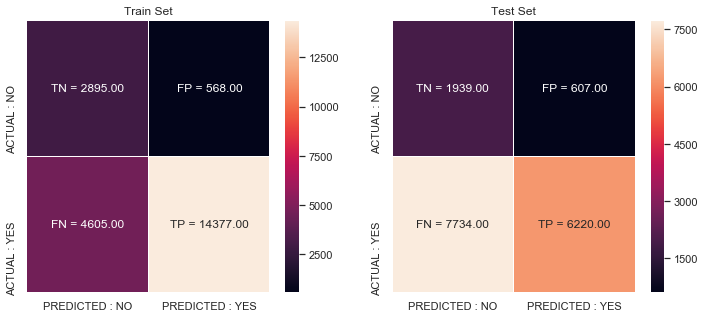

In [266]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

## Tree Visualization

In [120]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

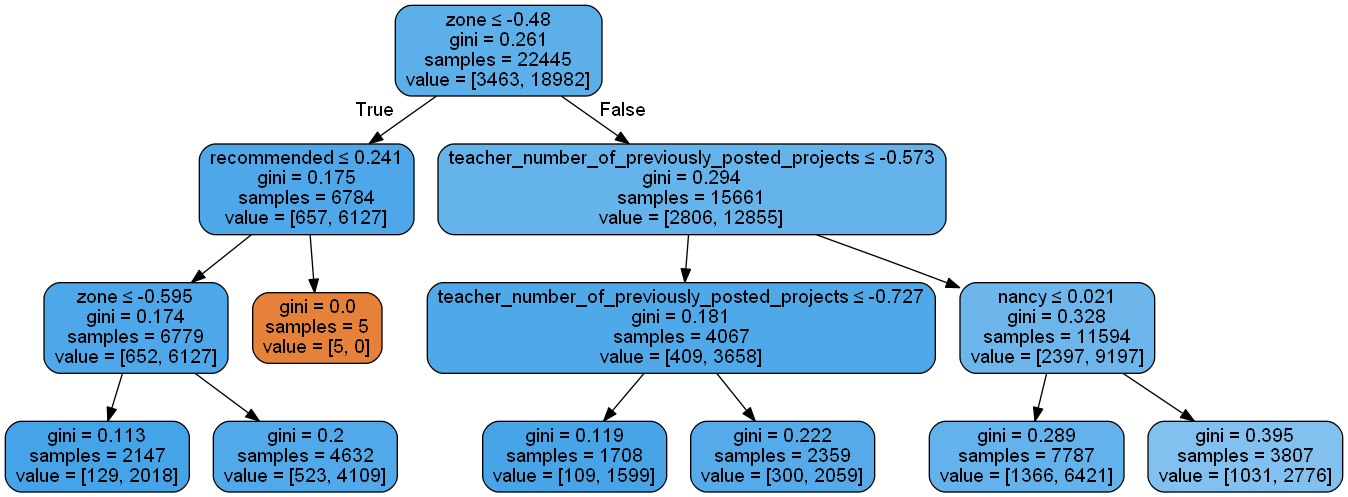

In [121]:
dot_data = StringIO()

export_graphviz(classifier_viz, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=BOW_feature)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## False Positive Word Cloud

In [123]:
bow_test = test_text_bow.todense()
print(bow_test.shape)
len(BOW_feat_essay)

(16500, 8869)


8869

In [124]:
y_test_list = list(y_test[::])
len(y_test_list)

16500

In [125]:
fp_index = []
fp_count = 0

for i in range(len(y_test_pred)):
    if y_test_list[i] == 0 and y_test_pred[i] <= 0.9:
        fp_index.append(i)
        fp_count = fp_count + 1 
    else :
        pass
print(fp_count)
print(fp_index[0:10])

2491
[0, 2, 3, 9, 14, 15, 20, 23, 26, 43]


In [126]:
df1 = pd.DataFrame(bow_test) 
df1_final = df1.iloc[fp_index,:]
print(df1_final.shape)

(2491, 8869)


In [127]:
best_indices = []

for j in range(8869):    
    s = df1_final[j].sum()
    if s >= 100 :
        best_indices.append(j)
    else :
        continue   
print(len(best_indices))
print(best_indices[0:10])

591
[3, 45, 105, 161, 162, 163, 182, 183, 194, 234]


In [128]:
fp_words = []

for a in best_indices :
    fp_words.append(str(BOW_feature[a]))
print(fp_words[0:10])

['Music_Arts', 'WY', '10th', '31', '32', '320', '43', '44', '504', '81']


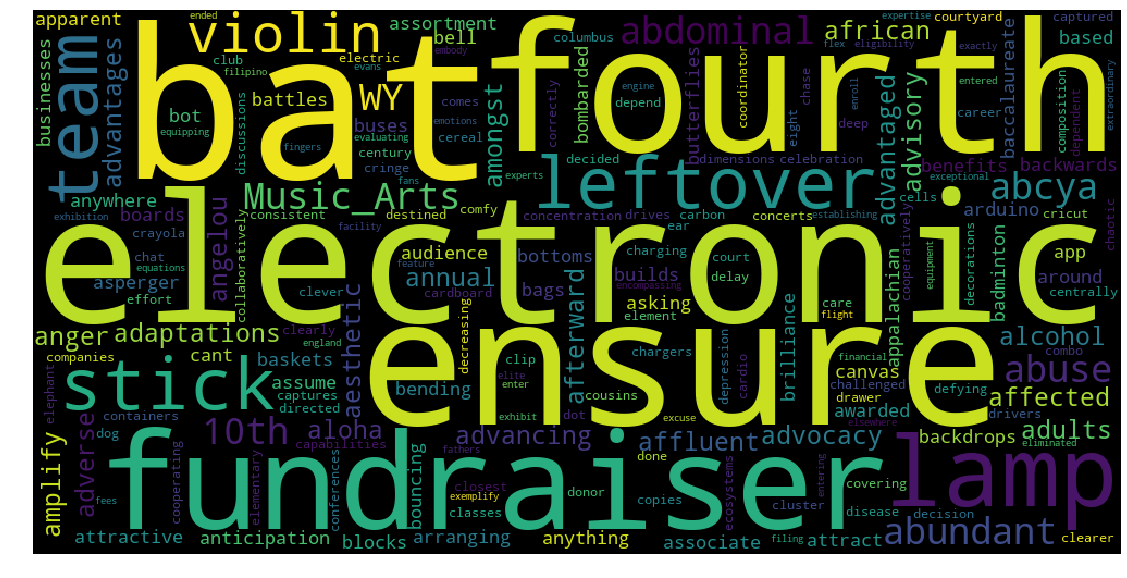

In [129]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
#convert list to string and generate
words_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Box & PDF plot for False Positives

In [130]:
df = pd.DataFrame(x_test['price'])
print(df.head(2))

    price
0  337.18
1   89.49


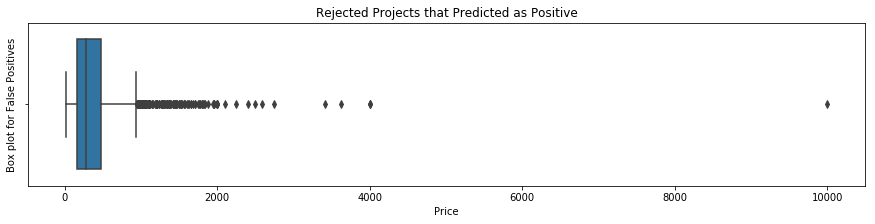

In [131]:
plt.figure(figsize=(15,3))
df1 = df.iloc[fp_index, : ]
sea.boxplot(df1.values)
plt.title("Rejected Projects that Predicted as Positive")
plt.ylabel("Box plot for False Positives")
plt.xlabel("Price")
plt.show()

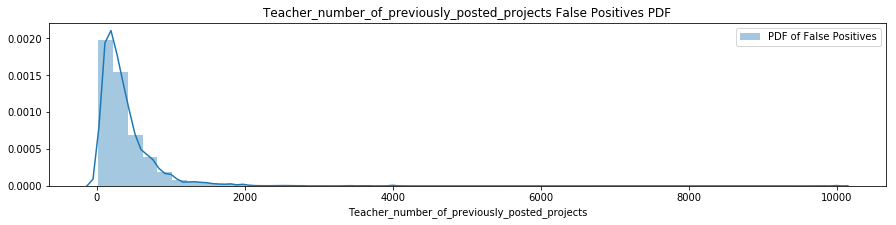

In [132]:
plt.figure(figsize=(15,3))
sns.distplot(df1.values, label="PDF of False Positives")
plt.title('Teacher_number_of_previously_posted_projects False Positives PDF')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()


## 2.3 Merging all Categorical and Numerical _ SET-3 AVG-W2V Encoding

In [133]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                  train_teacher_one_hot, train_title_avg_w2v_vectors, train_avg_w2v_vectors, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar, train_title_word_count_standar, train_essay_word_count_standar)).tocsr()
print(X_train.shape, y_train.shape)
print(type(X_train))

(22445, 707) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [134]:
X_test = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot, test_title_avg_w2v_vectors, test_avg_w2v_vectors, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar, test_title_word_count_standar, test_essay_word_count_standar)).tocsr()
print(X_test.shape, y_test.shape)
print(type(X_test))

(16500, 707) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [135]:
X_cv = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_state_one_hot, cv_grade_one_hot,
                  cv_teacher_one_hot, cv_title_avg_w2v_vectors, cv_avg_w2v_vectors, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar, cv_positive_standar, cv_negitive_standar,
                  cv_neutral_standar, cv_title_word_count_standar, cv_essay_word_count_standar)).tocsr()
print(X_cv.shape, y_cv.shape)
print(type(X_cv))

(11055, 707) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


In [136]:
print(X_train1.shape, y_train.shape)

(49041, 708) (49041,)


### Hyperparameter Tunning

In [136]:
DT = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

classifier = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
classifier.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

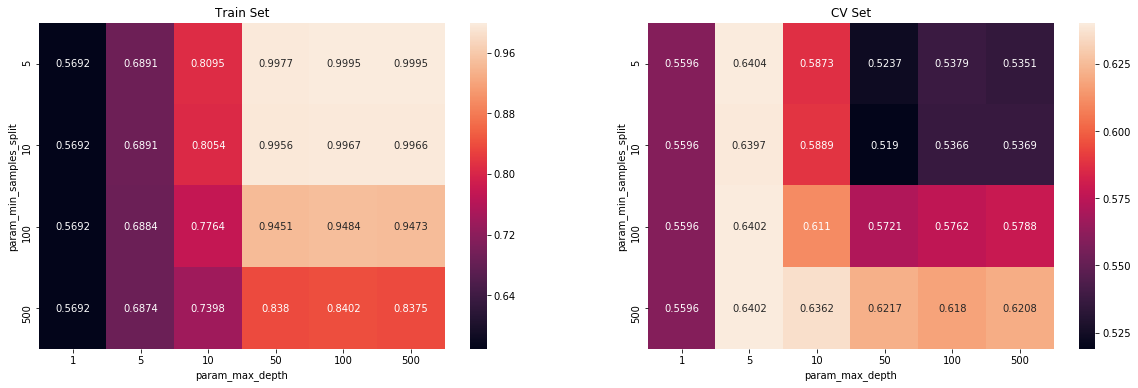

In [137]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### Training Model Using Hyperparameter

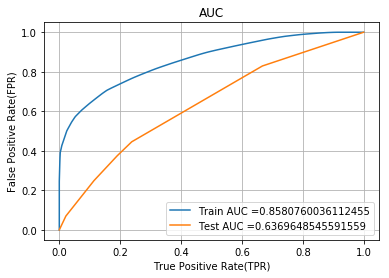

In [138]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 50, min_samples_split = 500)
classifier_viz = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

classifier.fit(X_train, y_train)
classifier_viz.fit(X_train, y_train)

y_train_pred = batch_predict(classifier,X_train)    
y_test_pred = batch_predict(classifier_viz,X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Train & Test Confusion Matrix

the maximum value of tpr*(1-fpr) 0.5957659844198493 for threshold 0.75
the maximum value of tpr*(1-fpr) 0.3397072481785906 for threshold 0.867


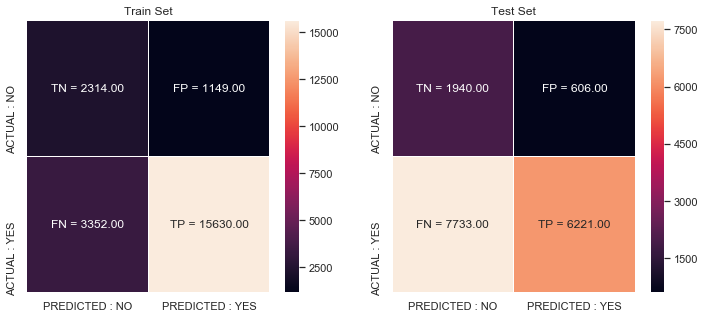

In [139]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### False Positive Words Clouds

In [141]:
bow_test = test_text_bow.todense()
print(bow_test.shape)
len(BOW_feat_essay)

(16500, 8869)


8869

In [142]:
y_test_list = list(y_test[::])
len(y_test_list)

16500

In [143]:
fp_index = []
fp_count = 0

for i in range(len(y_test_pred)):
    if y_test_list[i] == 0 and y_test_pred[i] <= 0.9:
        fp_index.append(i)
        fp_count = fp_count + 1 
    else :
        pass
print(fp_count)
print(fp_index[0:10])

2256
[0, 3, 9, 14, 15, 20, 23, 26, 43, 48]


In [144]:
df1 = pd.DataFrame(bow_test) 
df1_final = df1.iloc[fp_index,:]
print(df1_final.shape)

(2256, 8869)


In [145]:
best_indices = []

for j in range(8869):    
    s = df1_final[j].sum()
    if s >= 100 :
        best_indices.append(j)
    else :
        continue   
print(len(best_indices))
print(best_indices[0:10])

554
[3, 105, 161, 162, 163, 182, 194, 234, 255, 259]


In [146]:
fp_words = []

for a in best_indices :
    fp_words.append(str(BOW_feature[a]))
print(fp_words[0:10])

['Music_Arts', '10th', '31', '32', '320', '43', '504', '81', '99', 'abcya']


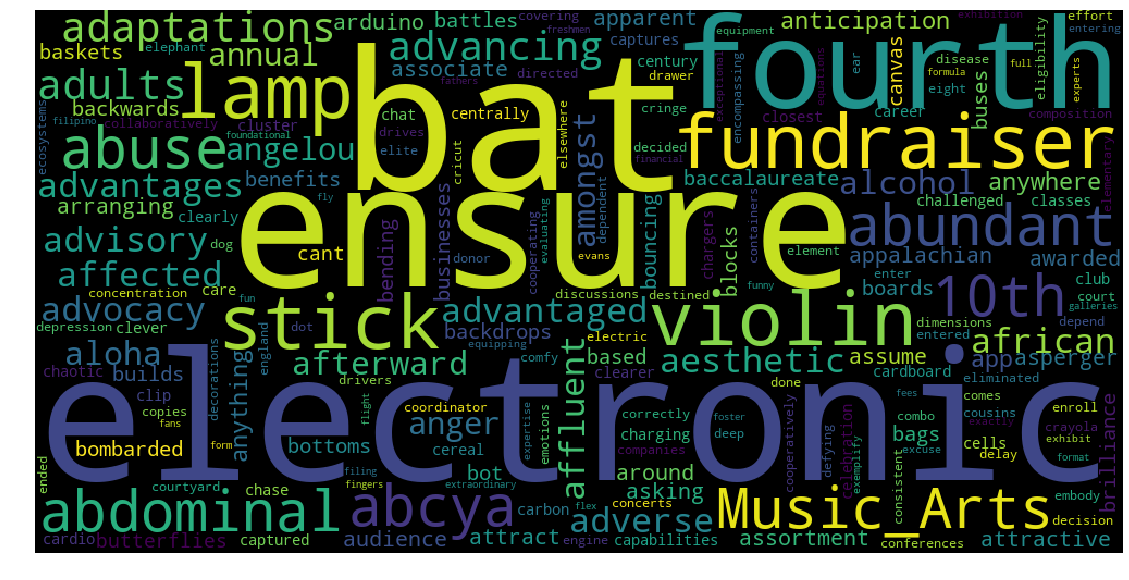

In [147]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
#convert list to string and generate
words_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Box & PDF Plot for False Positive

In [148]:
df = pd.DataFrame(x_test['price'])
print(df.head(2))

    price
0  337.18
1   89.49


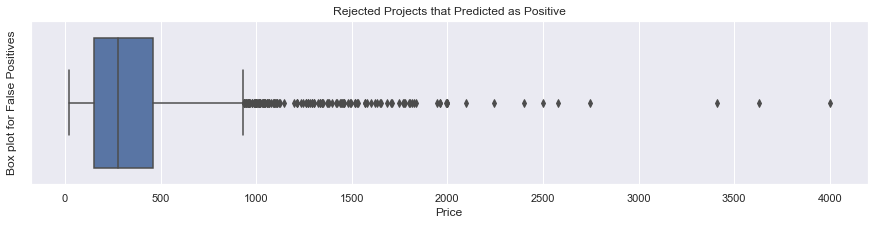

In [149]:
plt.figure(figsize=(15,3))
df1 = df.iloc[fp_index, : ]
sea.boxplot(df1.values)
plt.title("Rejected Projects that Predicted as Positive")
plt.ylabel("Box plot for False Positives")
plt.xlabel("Price")
plt.show()

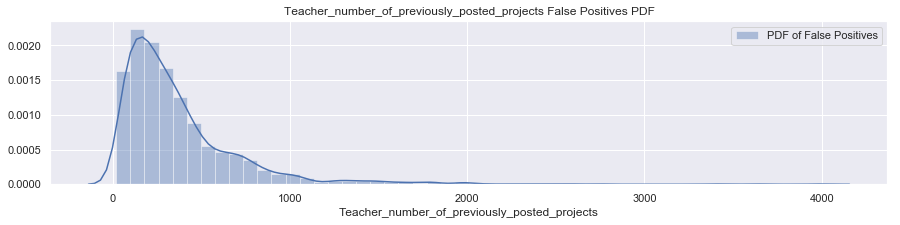

In [150]:
plt.figure(figsize=(15,3))
sns.distplot(df1.values, label="PDF of False Positives")
plt.title('Teacher_number_of_previously_posted_projects False Positives PDF')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()


## 2.4 Merging all Categorical and Numerical _ SET-4 TFIDF-W2V Encoding

In [161]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train1 = hstack((train_categories_one_hot,train_sub_categories_one_hot,train_state_one_hot,train_grade_one_hot,
                   train_teacher_one_hot, train_title_tfidf_w2v_vectors, train_essay_tfidf_w2v_vectors,
                   train_quantity_standar, train_prev_proj_standar, train_price_standar,train_positive_standar,
                   train_negitive_standar,  train_neutral_standar, train_title_word_count_standar, 
                   train_essay_word_count_standar)).tocsr()
print(X_train1.shape, y_train.shape)
print(type(X_train1)) #train_title_tfidf_w2v_vectors train_essay_tfidf_w2v_vectors

(22445, 707) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [162]:
X_test1 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot, test_title_tfidf_w2v_vectors, test_essay_tfidf_w2v_vectors,
                  test_quantity_standar, test_prev_proj_standar, test_price_standar, test_positive_standar,
                  test_negitive_standar, test_neutral_standar, test_title_word_count_standar, 
                  test_essay_word_count_standar)).tocsr()
print(X_test1.shape, y_test.shape)
print(type(X_test1)) #train_title_tfidf_w2v_vectors train_essay_tfidf_w2v_vectors

(16500, 707) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [163]:
X_cv1 = hstack((cv_categories_one_hot, cv_sub_categories_one_hot, cv_state_one_hot, cv_grade_one_hot,
                   cv_teacher_one_hot, cv_title_tfidf_w2v_vectors, cv_essay_tfidf_w2v_vectors,
                   cv_quantity_standar, cv_prev_proj_standar, cv_price_standar,cv_positive_standar,
                   cv_negitive_standar, cv_neutral_standar, cv_title_word_count_standar, 
                   cv_essay_word_count_standar)).tocsr()
print(X_cv1.shape, y_cv.shape)
print(type(X_cv1)) #train_title_tfidf_w2v_vectors train_essay_tfidf_w2v_vectors

(11055, 707) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


In [164]:
print(X_train.shape, y_train.shape)

(22445, 707) (22445,)


### Hyperparameter Tunning

In [165]:
DT = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

classifier = GridSearchCV(DT, parameters, cv=3, scoring='roc_auc')
classifier.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

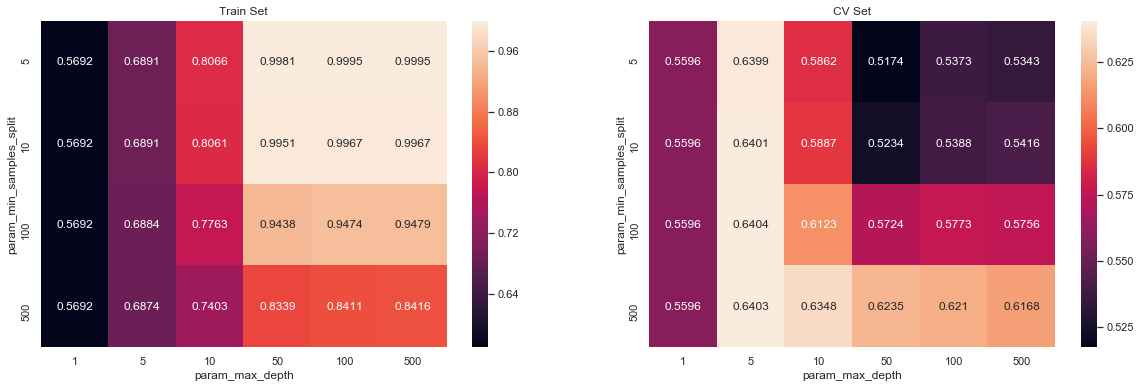

In [167]:
max_scores = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sea.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sea.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### Training Model using Best Hyperparameter

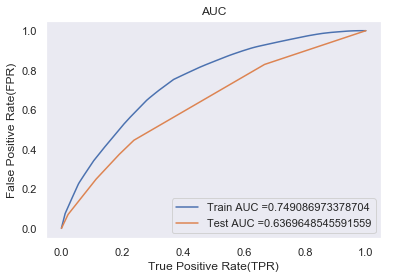

In [170]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
classifier_viz = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

classifier.fit(X_train, y_train)
classifier_viz.fit(X_train, y_train)

y_train_pred = batch_predict(classifier,X_train)    
y_test_pred = batch_predict(classifier_viz,X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Train & Test Confusion Matrix

the maximum value of tpr*(1-fpr) 0.4758952148627332 for threshold 0.902
the maximum value of tpr*(1-fpr) 0.3397072481785906 for threshold 0.867


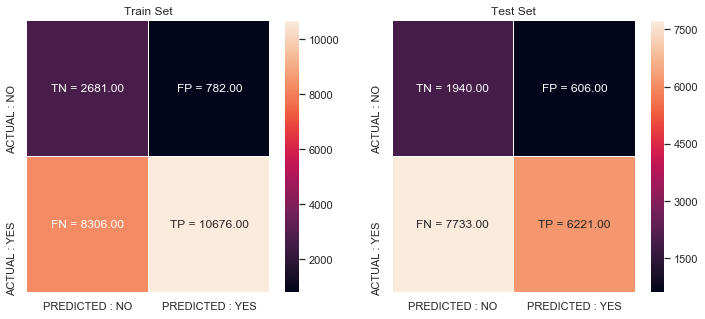

In [171]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### False Positive Word Cloud

In [173]:
bow_test = test_text_bow.todense()
print(bow_test.shape)
len(BOW_feat_essay)

(16500, 8869)


8869

In [174]:
y_test_list = list(y_test[::])
len(y_test_list)

16500

In [175]:
fp_index = []
fp_count = 0

for i in range(len(y_test_pred)):
    if y_test_list[i] == 0 and y_test_pred[i] <= 0.9:
        fp_index.append(i)
        fp_count = fp_count + 1 
    else :
        pass
print(fp_count)
print(fp_index[0:10])

2256
[0, 3, 9, 14, 15, 20, 23, 26, 43, 48]


In [176]:
df1 = pd.DataFrame(bow_test) 
df1_final = df1.iloc[fp_index,:]
print(df1_final.shape)

(2256, 8869)


In [177]:
best_indices = []

for j in range(8869):    
    s = df1_final[j].sum()
    if s >= 100 :
        best_indices.append(j)
    else :
        continue   
print(len(best_indices))
print(best_indices[0:10])

554
[3, 105, 161, 162, 163, 182, 194, 234, 255, 259]


In [178]:
fp_words = []

for a in best_indices :
    fp_words.append(str(BOW_feature[a]))
print(fp_words[0:10])

['Music_Arts', '10th', '31', '32', '320', '43', '504', '81', '99', 'abcya']


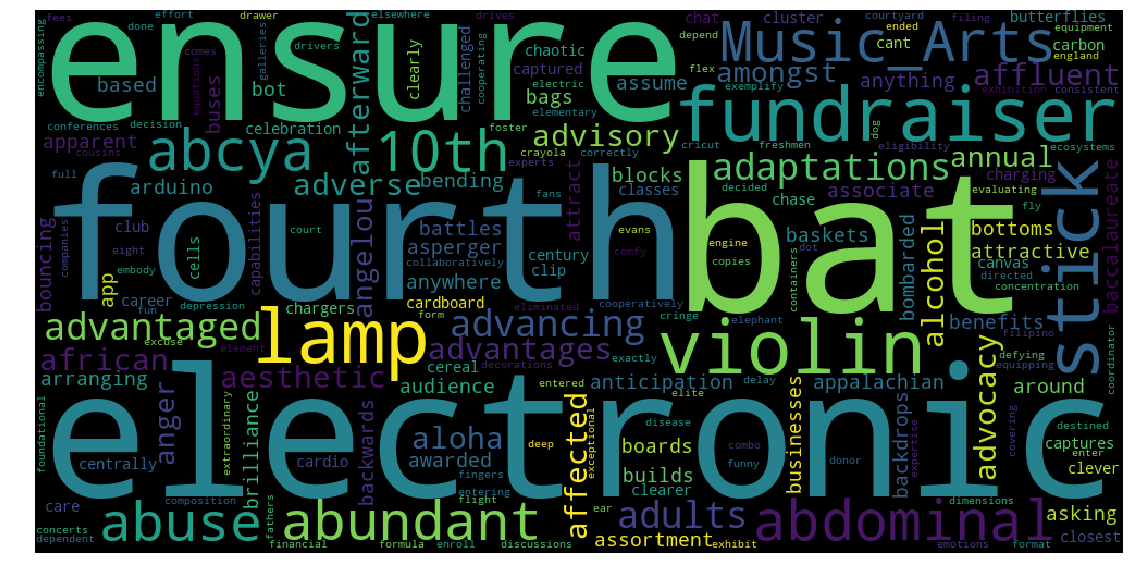

In [179]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
#convert list to string and generate
words_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Box & PDF plot for False Positives

In [180]:
df = pd.DataFrame(x_test['price'])
print(df.head(2))

    price
0  337.18
1   89.49


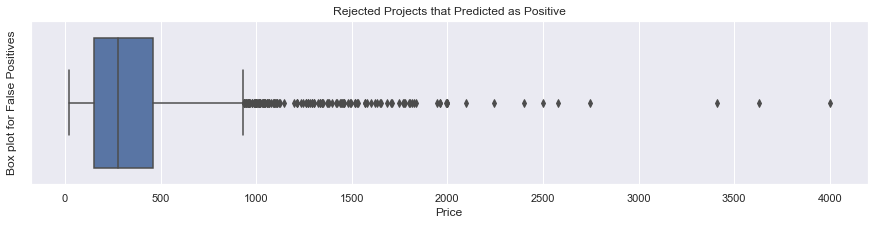

In [181]:
plt.figure(figsize=(15,3))
df1 = df.iloc[fp_index, : ]
sea.boxplot(df1.values)
plt.title("Rejected Projects that Predicted as Positive")
plt.ylabel("Box plot for False Positives")
plt.xlabel("Price")
plt.show()

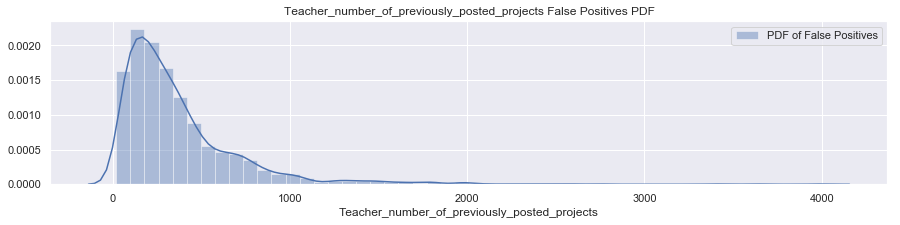

In [182]:
plt.figure(figsize=(15,3))
sns.distplot(df1.values, label="PDF of False Positives")
plt.title('Teacher_number_of_previously_posted_projects False Positives PDF')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()


## 2.5 Apply Decision Tree on Set-5

<b>[Task-2]</b> Select 5k best features from features of Set 2 using`feature_importances_`, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3 </br> </br>


In [211]:
X_train1 = hstack((train_categories_one_hot, train_sub_categories_one_hot, train_state_one_hot, train_grade_one_hot,
                  train_teacher_one_hot,train_text_tfidf, train_title_tfidf, train_quantity_standar,
                  train_prev_proj_standar, train_price_standar, train_title_word_count_standar, 
                  train_essay_word_count_standar, train_positive_standar, train_negitive_standar,
                  train_neutral_standar)).tocsr()
print(X_train1.shape, y_train.shape)
print(type(X_train1))

(22445, 10205) (22445,)
<class 'scipy.sparse.csr.csr_matrix'>


In [212]:
X_test1 = hstack((test_categories_one_hot,test_sub_categories_one_hot,test_state_one_hot,test_grade_one_hot,
                  test_teacher_one_hot,test_text_tfidf, test_title_tfidf, test_quantity_standar,
                  test_prev_proj_standar, test_price_standar,test_title_word_count_standar, 
                  test_essay_word_count_standar, test_positive_standar, test_negitive_standar,
                  test_neutral_standar)).tocsr()
print(X_test1.shape, y_test.shape)
print(type(X_test1))

(16500, 10205) (16500,)
<class 'scipy.sparse.csr.csr_matrix'>


In [215]:
X_cv1 = hstack((cv_categories_one_hot,cv_sub_categories_one_hot,cv_state_one_hot,cv_grade_one_hot,
                  cv_teacher_one_hot,cv_text_tfidf, cv_title_tfidf, cv_quantity_standar,
                  cv_prev_proj_standar, cv_price_standar, cv_title_word_count_standar, 
                  cv_essay_word_count_standar, cv_positive_standar, cv_negitive_standar,
                  cv_neutral_standar)).tocsr()
print(X_cv1.shape, y_cv.shape)
print(type(X_cv1))

(11055, 10205) (11055,)
<class 'scipy.sparse.csr.csr_matrix'>


In [221]:
# https://datascience.stackexchange.com/questions/6683/feature-selection-using-feature-importances-in-random-forests-with-scikit-learn
https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importances-error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def selectKImportance(model, X, k=5):
     return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

In [222]:
X_train1_best = selectKImportance(classifier_5, X_train1, 5000)
X_test1_best = selectKImportance(classifier_5, X_test1, 5000)

In [224]:
print(X_train1_best.shape)
print(X_test1_best.shape)

(22445, 5000)
(16500, 5000)


### Hyperparameter Tunning

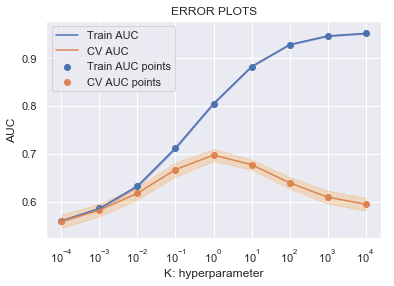

In [225]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

LG = LogisticRegression()

parameters = {'C': [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

classif = GridSearchCV(LG, parameters, cv=7, scoring='roc_auc')
classifier = classif.fit(X_train1_best, y_train)

train_auc= classif.cv_results_['mean_train_score']
train_auc_std= classif.cv_results_['std_train_score']
cv_auc = classif.cv_results_['mean_test_score'] 
cv_auc_std = clf.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std, cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')

plt.xscale('log')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

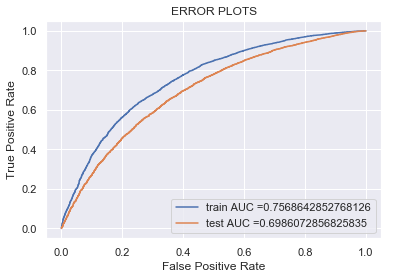

In [234]:
from sklearn.metrics import roc_curve, auc


classif_5 = LogisticRegression(C=1, penalty='l1');
classif_5.fit(X_train1_best, y_train)

y_train_pred = batch_predict(classif_5, X_train1_best)    
y_test_pred = batch_predict(classif_5, X_test1_best)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

### Confusion Matrix

the maximum value of tpr*(1-fpr) 0.47702875679021484 for threshold 0.831
the maximum value of tpr*(1-fpr) 0.4218306902457305 for threshold 0.847


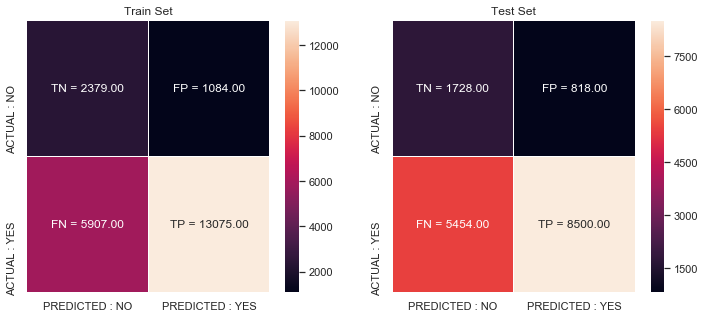

In [228]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

<h1>3. Conclusion</h1>

In [240]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
TB = PrettyTable()
TB.field_names = ["Model", "Hyperparameter", "Train_AUC", "Test_Auc"]
TB.title = "Decision Tree"
TB.add_row(["BOW-Model", "Depth:100 | Samp_Split:500", 0.92,0.68])
TB.add_row(["TFIDF-Model", "Depth:50 | Samp_Split:500", 0.88, 0.62])
TB.add_row(["AvgW2v-Model", "Depth:100 | Samp_Split:500", 0.85, 0.63])
TB.add_row(["Tf-Idf-Model", "Depth:10 | Samp_Split:500", 0.74, 0.63])
TB.add_row(["Logistic Reg on Best 5K","C:1.0  | Reg: L1", 0.75, 0.69])
print(TB)

+-------------------------+----------------------------+-----------+----------+
|          Model          |       Hyperparameter       | Train_AUC | Test_Auc |
+-------------------------+----------------------------+-----------+----------+
|        BOW-Model        | Depth:100 | Samp_Split:500 |    0.92   |   0.68   |
|       TFIDF-Model       | Depth:50 | Samp_Split:500  |    0.88   |   0.62   |
|       AvgW2v-Model      | Depth:100 | Samp_Split:500 |    0.85   |   0.63   |
|       Tf-Idf-Model      | Depth:10 | Samp_Split:500  |    0.74   |   0.63   |
| Logistic Reg on Best 5K |      C:1.0  | Reg: L1      |    0.75   |   0.69   |
+-------------------------+----------------------------+-----------+----------+
